<a href="https://colab.research.google.com/github/erikk-avans/Machine-Learning/blob/master/Deep_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Intro

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

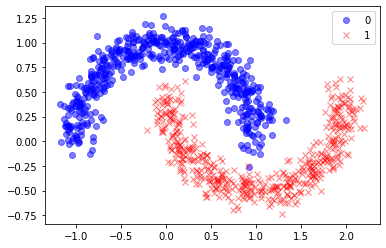

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


Using TensorFlow backend.


In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Shallow Model

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model.fit(X_train, y_train, epochs=200, validation_data=[X_test,y_test], shuffle=True, verbose=2)




Train on 700 samples, validate on 300 samples
Epoch 1/200





 - 1s - loss: 0.5645 - acc: 0.7686 - val_loss: 0.4438 - val_acc: 0.8367
Epoch 2/200
 - 0s - loss: 0.3467 - acc: 0.8786 - val_loss: 0.3712 - val_acc: 0.8267
Epoch 3/200
 - 0s - loss: 0.2885 - acc: 0.8743 - val_loss: 0.3517 - val_acc: 0.8267
Epoch 4/200
 - 0s - loss: 0.2667 - acc: 0.8757 - val_loss: 0.3389 - val_acc: 0.8233
Epoch 5/200
 - 0s - loss: 0.2548 - acc: 0.8800 - val_loss: 0.3311 - val_acc: 0.8333
Epoch 6/200
 - 0s - loss: 0.2482 - acc: 0.8814 - val_loss: 0.3258 - val_acc: 0.8400
Epoch 7/200
 - 0s - loss: 0.2407 - acc: 0.8843 - val_loss: 0.3210 - val_acc: 0.8433
Epoch 8/200
 - 0s - loss: 0.2368 - acc: 0.8857 - val_loss: 0.3185 - val_acc: 0.8433
Epoch 9/200
 - 0s - loss: 0.2332 - acc: 0.8857 - val_loss: 0.3188 - val_acc: 0.8500
Epoch 10/200
 - 0s - loss: 0.2315 - acc: 0.8857 - val_loss: 0.3159 - val_acc: 0.8433
Epoch 11/200
 - 0s - loss: 0.2293 - acc: 0.8843 - val_loss: 0.3147 - val_acc: 0.8400
Epoch 12/200
 - 0s -

In [10]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 55us/step


In [11]:
results

[0.31818889200687406, 0.8466666674613953]

In [12]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


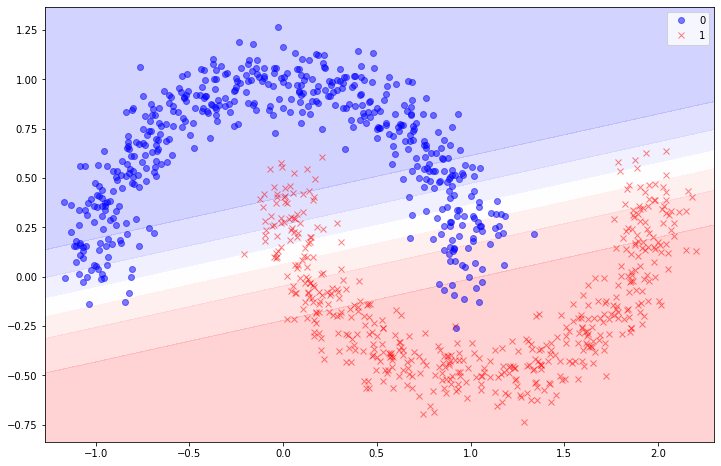

In [13]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [0]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 0.5310 - acc: 0.7457
Epoch 2/100
 - 0s - loss: 0.2989 - acc: 0.8886
Epoch 3/100
 - 0s - loss: 0.2749 - acc: 0.8871
Epoch 4/100
 - 0s - loss: 0.2945 - acc: 0.8771
Epoch 5/100
 - 0s - loss: 0.2428 - acc: 0.8957
Epoch 6/100
 - 0s - loss: 0.2005 - acc: 0.9171
Epoch 7/100
 - 0s - loss: 0.1206 - acc: 0.9600
Epoch 8/100
 - 0s - loss: 0.0626 - acc: 0.9814
Epoch 9/100
 - 0s - loss: 0.0339 - acc: 0.9929
Epoch 10/100
 - 0s - loss: 0.0231 - acc: 0.9971
Epoch 11/100
 - 0s - loss: 0.0195 - acc: 0.9957
Epoch 12/100
 - 0s - loss: 0.0141 - acc: 0.9971
Epoch 13/100
 - 0s - loss: 0.0170 - acc: 0.9957
Epoch 14/100
 - 0s - loss: 0.0190 - acc: 0.9914
Epoch 15/100
 - 0s - loss: 0.0115 - acc: 0.9986
Epoch 16/100
 - 0s - loss: 0.0115 - acc: 0.9971
Epoch 17/100
 - 0s - loss: 0.0152 - acc: 0.9957
Epoch 18/100
 - 0s - loss: 0.0105 - acc: 0.9986
Epoch 19/100
 - 0s - loss: 0.0103 - acc: 0.9929
Epoch 20/100
 - 0s - loss: 0.0117 - acc: 0.9957
Epoch 21/100
 - 0s - loss: 0.0064 - acc: 0.9986
E

In [16]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 196us/step


[0.0023661837622057647, 1.0]

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


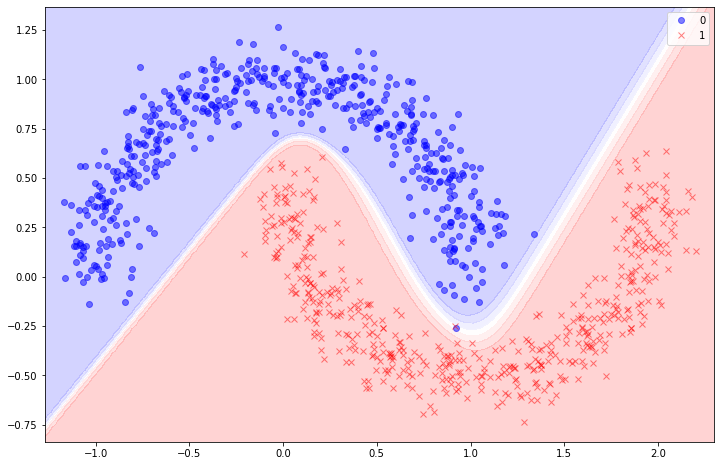

In [19]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [0]:
df = pd.read_csv('../data/iris.csv')

In [0]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [0]:
df.head()

In [0]:
X = df.drop('species', axis=1)
X.head()

In [0]:
target_names = df['species'].unique()
target_names

In [0]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

In [0]:
y= df['species'].map(target_dict)
y.head()

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_cat = to_categorical(y)

In [0]:
y_cat[:10]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [0]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred[:5]

In [0]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test_class, y_pred_class))

In [0]:
confusion_matrix(y_test_class, y_pred_class)

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.
